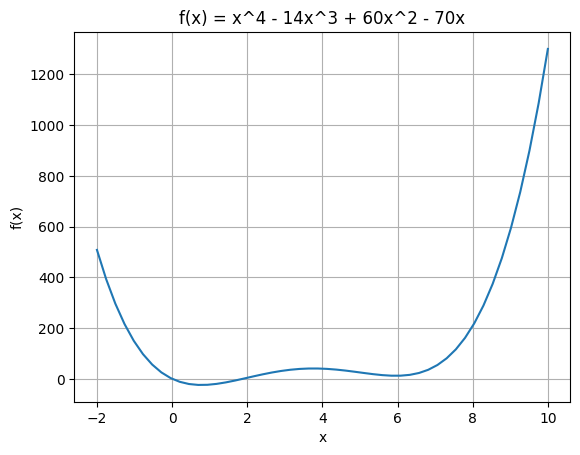

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.typing import NDArray


def f(x: NDArray[np.float64] | float) -> NDArray[np.float64] | float:
    return x**4 - 14 * x**3 + 60 * x**2 - 70 * x


xs = np.linspace(-2, 10, 50) # gera um array de 50 pontos entre -1 e 10
ys = f(xs)

plt.plot(xs, ys)
plt.title("f(x) = x^4 - 14x^3 + 60x^2 - 70x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [27]:
def min_with_greedy(x0: float, step: float = 1.0, n_iter: int = 1000) -> float:
    x = x0
    for _ in range(n_iter):
        new_x = x + random.uniform(-step, step)
        if f(new_x) < f(x):
            x = new_x
    return x


def min_with_simulated_annealing(x0: float, temperature: float, cooling_rate: float = 0.999, n_iter: int = 1000, step: float = 1.0) -> float:
    x = x0
    for _ in range(n_iter):
        new_x = x + random.uniform(-step, step)
        f_x = f(x)
        f_new_x = f(new_x)
        probability = np.exp((f_x - f_new_x) / temperature)
        temperature *= cooling_rate
        if f(new_x) < f(x) or random.random() < probability:
            x = new_x
    return x

Initial point: 10


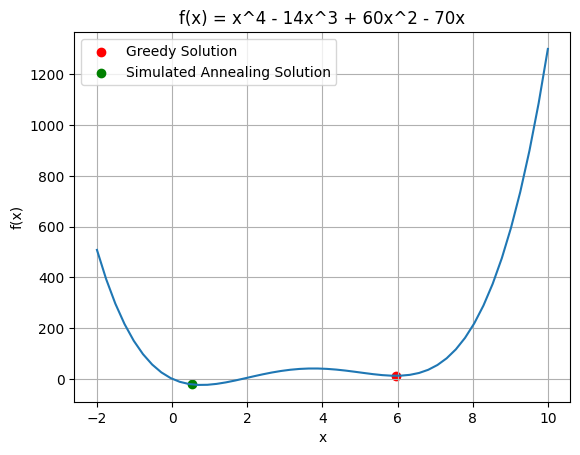

In [81]:
x0 = random.randint(-2, 10)
print("Initial point:", x0)

greedy_solution = min_with_greedy(x0, n_iter=10_000)
simulated_annealing_solution = min_with_simulated_annealing(x0, temperature=100_000.0, n_iter=10_000)

plt.plot(xs, ys)
plt.scatter(greedy_solution, f(greedy_solution), color='red', label='Greedy Solution')
plt.scatter(simulated_annealing_solution, f(simulated_annealing_solution), color='green', label='Simulated Annealing Solution')
plt.title("f(x) = x^4 - 14x^3 + 60x^2 - 70x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()